# <center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>


## **<center>ML1: ABALONE AGE PREDICTION</center>**

<a name = Section2></a>
# **Problem Statement**
---

The current process suffers from the following problems:

- Since the age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

- This becomes a quite boring and time-consuming task.

- The company has hired you as data science consultants. They want to automate the process of predicting the age of abalone from other physical measurements rather than doing this manual work.

<a name = Section33></a>
### **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")

<a name = Section33></a>
### **Data Acquisition**

In [33]:
train=pd.read_csv('abalone_train.csv')

In [4]:
train.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


### Dataset Feature Description
The Dataset contains the following columns:

||Column Name|Description|
|:--|:--|:--|
||**ID**| Unique Id of the sample. |
||**Sex**| The sex of the abalone (M, F, and I (infant)). |
||**Length**| Longest shell measurement (mm). |
||**Diameter**| Diameter of abalone perpendicular to length (mm). |
||**Height**| Height of abalone with meat in the shell (mm).|
||**Whole_weight**| Weight of the whole abalone (grams). |
||**Shucked_weight**| Weight of the meat of abalone (grams). |
||**Viscera_weight**| Gut weight (after bleeding) of the abalone (grams). |
||**Shell_weight**| Weight of the abalone after being dried (grams).|
||**Rings**| Number of Rings in the abalone.|

<a name = Section41></a>
### **Data Info, Data Description and Null Value Checking**

- In this section we will get **description** and **statistics** about the data.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 261.1+ KB


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3341.0,2085.442083,1197.721846,0.0000,1055.0000,2086.0000,3114.0000,4175.0000
Length,3341.0,0.525887,0.119759,0.0750,0.4500,0.5450,0.6200,0.8150
Diameter,3341.0,0.409463,0.098895,0.0550,0.3500,0.4250,0.4850,0.6500
Height,3341.0,0.140129,0.042623,0.0000,0.1150,0.1450,0.1650,1.1300
Whole_weight,3341.0,0.838176,0.493789,0.0020,0.4445,0.8100,1.1685,2.7795
Shucked_weight,3341.0,0.363600,0.224156,0.0010,0.1880,0.3415,0.5095,1.4880
Viscera_weight,3341.0,0.182507,0.110439,0.0005,0.0935,0.1725,0.2555,0.7600
Shell_weight,3341.0,0.241385,0.139828,0.0015,0.1320,0.2350,0.3300,1.0050
Rings,3341.0,9.958396,3.205591,1.0000,8.0000,10.0000,11.0000,27.0000


In [9]:
from pandas_profiling import ProfileReport
profile=ProfileReport(train,title='Pandas Profile Report')
profile.to_widgets()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
#drop ID column
train.drop(columns=['Id'],inplace=True)

In [10]:
train['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

In [14]:
#Applying One-hot encoding for Sex column 
train=pd.get_dummies(train,columns=['Sex'],drop_first=True)

In [17]:
train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,1,0
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,1,0
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,0,1
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,0,1
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,0,1
...,...,...,...,...,...,...,...,...,...,...
3336,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,10,0,1
3337,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,12,0,0
3338,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,10,0,1
3339,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,9,0,0


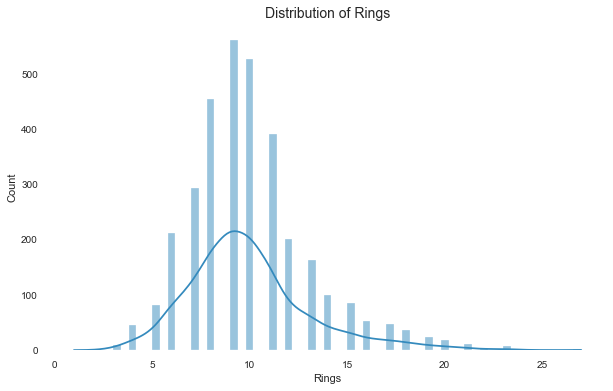

In [29]:
#Distribution of Rings
plt.figure(figsize=(10,6))
sns.histplot(data=train,x='Rings',kde=True)
plt.title('Distribution of Rings',fontsize=14)
plt.show()

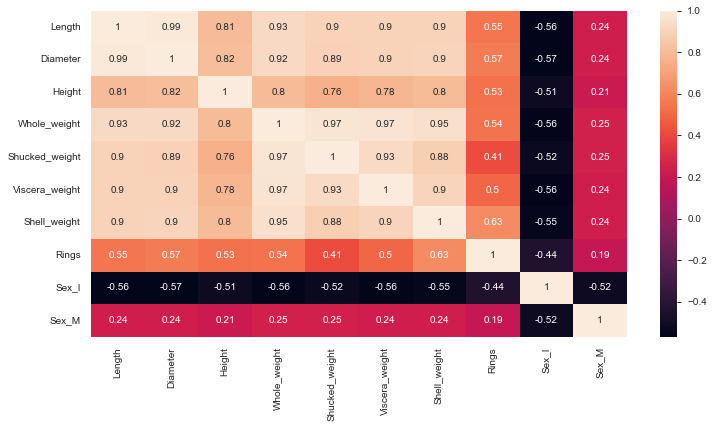

In [32]:
#Checking for correlations using Heatmap.
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),annot=True)
plt.show()

<AxesSubplot:ylabel='Height'>

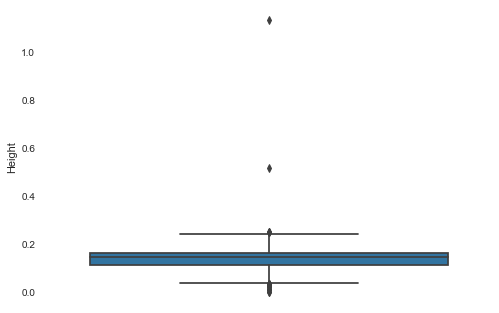

In [37]:
#Outlier checking for Heigh column
sns.boxplot(data=train,y='Height')

<AxesSubplot:ylabel='Length'>

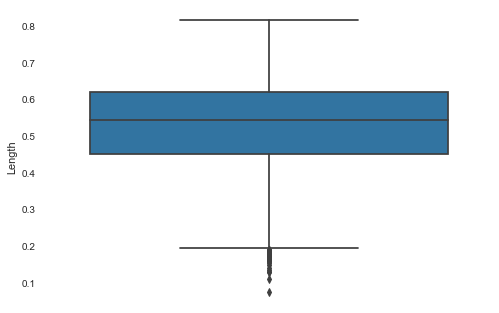

In [41]:
#Outlier checking for Length column
sns.boxplot(data=train,y='Length')

#### Splitig the data

In [18]:
X=train.drop('Rings',axis=1)
y=train['Rings']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### Linear Regression

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
lr_predictions=lr.predict(X_test)

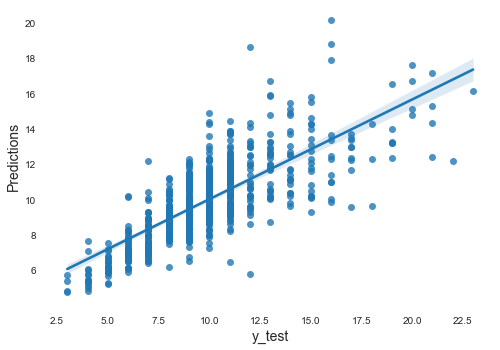

In [39]:
#Regplot between y_yest and predictions
sns.regplot(y_test,lr_predictions)
plt.xlabel('y_test',fontsize=14)
plt.ylabel('Predictions',fontsize=14)
plt.show()

In [40]:
MAE = metrics.mean_absolute_error(y_test, lr_predictions)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, lr_predictions)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, lr_predictions))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,lr_predictions)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 1.5177066364673604
MSE for test set is 4.264279880669239
RMSE for test set is 2.0650132882548817
R2 score for test set is 0.5845003451372262
Adjusted R2 score for test set is 0.5788258430222566


#### Decision Tree Regression

In [42]:
dt=DecisionTreeRegressor()

In [43]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
dt_predictions=dt.predict(X_test)

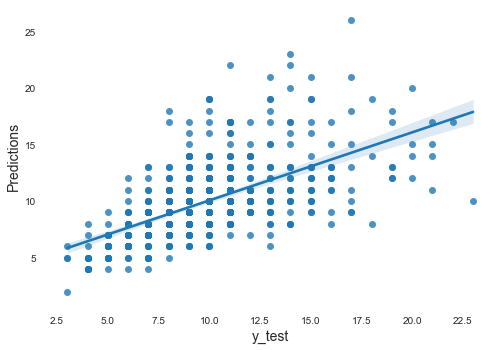

In [46]:
#Regplot between y_yest and predictions
sns.regplot(y_test,dt_predictions)
plt.xlabel('y_test',fontsize=14)
plt.ylabel('Predictions',fontsize=14)
plt.show()

In [47]:
MAE = metrics.mean_absolute_error(y_test, dt_predictions)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, dt_predictions)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, dt_predictions))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,dt_predictions)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 2.0358744394618835
MSE for test set is 8.298953662182361
RMSE for test set is 2.880790457874776
R2 score for test set is 0.1913728744704818
Adjusted R2 score for test set is 0.18032940841620926


#### Random Foresr Regression

In [48]:
rf=RandomForestRegressor()

In [49]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
rf_predictions=rf.predict(X_test)

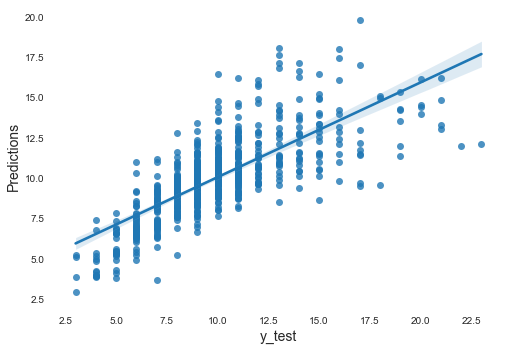

In [52]:
#Regplot between y_yest and predictions
sns.regplot(y_test,rf_predictions)
plt.xlabel('y_test',fontsize=14)
plt.ylabel('Predictions',fontsize=14)
plt.show()

In [53]:
MAE = metrics.mean_absolute_error(y_test, rf_predictions)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, rf_predictions)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,rf_predictions)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 1.529387144992526
MSE for test set is 4.547123766816143
RMSE for test set is 2.132398594732266
R2 score for test set is 0.5569408180042088
Adjusted R2 score for test set is 0.5508899338798354


In [54]:
from sklearn.model_selection import RandomizedSearchCV
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf
}

In [56]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid, cv=5, n_iter=10,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [57]:
# Display the best estimator
print(rf_randomcv.best_estimator_)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=500)


In [58]:
# Display the best score
print(rf_randomcv.best_score_)

0.537072204243658


In [59]:
# Display the best selected parameter by the randomizedSearchCV
print(rf_randomcv.best_params_)

{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10}


In [60]:
best_random_grid=rf_randomcv.best_estimator_

In [61]:
rf_predictions_cv=best_random_grid.predict(X_test)

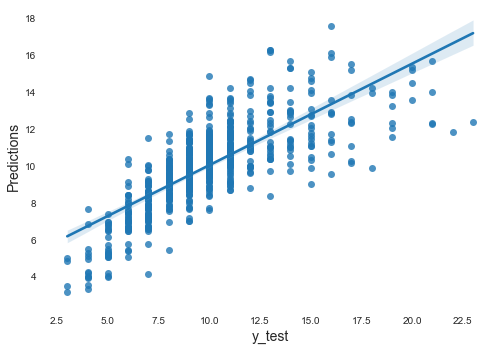

In [62]:
#Regplot between y_yest and predictions
sns.regplot(y_test,rf_predictions_cv)
plt.xlabel('y_test',fontsize=14)
plt.ylabel('Predictions',fontsize=14)
plt.show()

In [63]:
MAE = metrics.mean_absolute_error(y_test, rf_predictions_cv)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, rf_predictions_cv)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions_cv))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,rf_predictions_cv)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 1.460268745932345
MSE for test set is 4.263635560225049
RMSE for test set is 2.0648572735724495
R2 score for test set is 0.5845631259418811
Adjusted R2 score for test set is 0.5788894812278855


#### Conclusion

Among all Machine Learning models Linear regression gave the best RMSE score. So, I will predict the test data set with Linear Regression

#### Working with Test Data

In [64]:
test=pd.read_csv('abalone_test.csv')

In [65]:
test.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,668,M,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1,1580,I,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
2,3784,M,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
3,463,I,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
4,2615,M,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775


In [66]:
#drop Id Column
test.drop('Id',axis=1,inplace=True)

In [67]:
#Applying One-hot encoding for Sex column 
test=pd.get_dummies(test,columns=['Sex'],drop_first=True)

In [68]:
test

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,0,1
1,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,1,0
2,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,0,1
3,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,1,0
4,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,0,1
...,...,...,...,...,...,...,...,...,...
831,0.610,0.475,0.140,1.1330,0.5275,0.2355,0.3500,0,0
832,0.410,0.325,0.120,0.3745,0.1580,0.0810,0.1250,0,1
833,0.445,0.345,0.105,0.4090,0.1675,0.1015,0.1170,1,0
834,0.540,0.435,0.180,0.9960,0.3835,0.2260,0.3250,0,1


In [70]:
test_predictions=lr.predict(test)

In [81]:
df = pd.DataFrame(np.round(test_predictions,0), columns=['predictions']).to_csv('AbalonePrediction.csv',index=False,header=False)